In [1]:
from sxs.julia import PNWaveform

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [41]:
import sys
sys.path.append('/home/aniketkhairnar/Desktop/Numerical/Git_Repositories/GWScripts/waveform_utils/')
# sys.path.append('/home/aniketkhairnar/Desktop/Numerical/Cloned_repos/NRPNHybridization/')
# sys.path.append('/home/aniketkhairnar/Desktop/Numerical/Git_Repositories/GWScripts/pnbmsmapping/')

In [42]:
import scri
import sxs
import numpy as np
from matplotlib import pyplot as plt
import loading

In [17]:
sim = sxs.load('SXS:BBH:2331', extrapolation = 'N4').h
md = sim.metadata

In [18]:
ref_idx = np.abs(sim.t-(md.reference_time)).argmin()

In [32]:
t = (sim.t - md.reference_time)[ref_idx : ]

In [36]:
sim.t[ref_idx] - md.reference_time

np.float64(-0.44337497215383337)

In [38]:
sim.t[ref_idx + 1]

np.float64(1422.7283794167408)

In [39]:
h = sim[ref_idx: sim.max_norm_index()]
t = h.t - h.t[0]

In [31]:
t

array([0.00000000e+00, 1.17175439e+00, 2.34129128e+00, ...,
       8.35469775e+03, 8.35479774e+03, 8.35489774e+03], shape=(19238,))

In [27]:
M1 = md.reference_mass1
M2 = md.reference_mass2
chi1 = md.reference_dimensionless_spin1
chi2 = md.reference_dimensionless_spin2
Omega_i = np.linalg.norm(md.reference_orbital_frequency)

In [20]:
h_21 = h.data[:, h.index(2,1)]

θ = (-1)* (np.angle(-h_21)[0] -  0.5* np.pi)

R_i = np.array([np.cos(θ/2), 0, 0, np.sin(θ/2)])

In [21]:
w_PN = PNWaveform(M1, M2, chi1, chi2, Omega_i, modes_function=sxs.julia.h_bang, R_i = R_i, ell_min=2,
               ell_max=8, saveat = t)

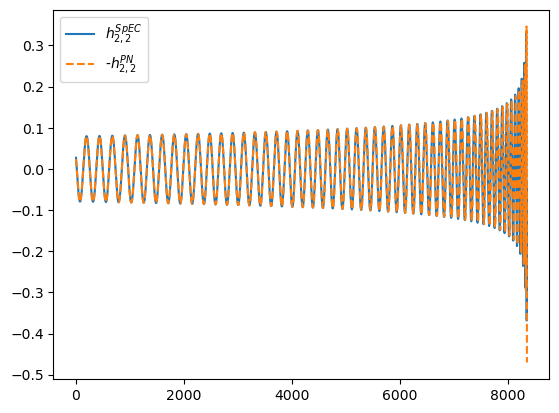

In [22]:
plt.plot(t, h.data[:, h.index(2,2)].real, label = r'$h_{2,2}^{SpEC}$')
plt.plot(w_PN.t, - w_PN.data[:, h.index(2,2)].real, '--', label = r'-$h_{2,2}^{PN}$')
# plt.ylim(-2.e-1, 2.e-1)
# plt.xlim(-500,4500)
plt.legend()
# plt.savefig('22.jpg')
plt.show()

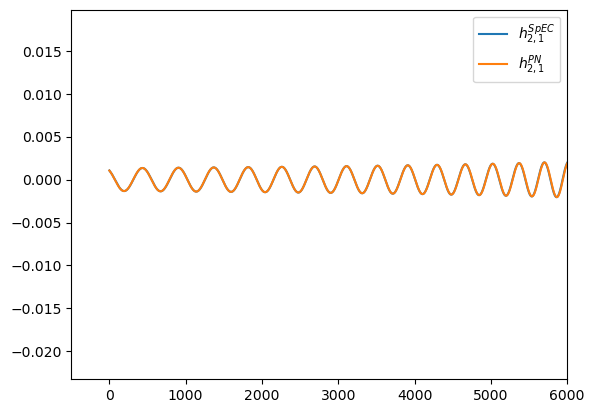

In [25]:
plt.plot(t, h.data[:, h.index(2,1)].real, label = r'$h_{2,1}^{SpEC}$')
plt.plot(w_PN.t, -w_PN.data[:, h.index(2,1)].real, label = r'$h_{2,1}^{PN}$')
# plt.ylim(-1.e-2, 1.e-2)
plt.legend()
plt.xlim(-500, 6000)
# plt.title('SXS:BBH:0507')
# plt.savefig('21.jpg')
plt.show()

In [43]:
def generate_freq0_and_frame0(t0, h):
    h_21 = h.data[:,h.index(2,1)]
    ψ_21 = np.angle(-h_21)
    t = h.t
    
    ω = np.gradient(-np.unwrap(ψ_21), t)

    # Starting frequency as input for PN waveform
    idx = abs(t - t0).argmin()
    ω0 = ω[idx]
    θ = - (ψ_21[idx] - np.pi/2)
    
    frame_0 = np.array([np.cos(θ/2), 0, 0, np.sin(θ/2)])

    return ω0, frame_0

def generate_target_PN(t0, mA, chiA, mB, chiB, h, t_PNStart, t_PNEnd):
    t = h.t
    idx = np.argmin(abs(t - t0))
    idx1 = np.argmin(abs(t - (t0 - t_PNStart)))
    idx2 = np.argmin(abs(t - (t0 + t_PNEnd)))
    times = t[idx:idx2]
    mA = mA
    mB = mB
    χA = chiA
    χB = chiB

    ω0, frame_0 = generate_freq0_and_frame0(t0, h)
    
    h_PN = PNWaveform(mA, mB, χA, χB, ω0, modes_function=h_bang, R_i = frame_0, saveat=times)
    # PsiM_PN = PNWaveform(q, ω0, χA, χB, t_0=t0, frame_0 = frame_0, t_PNStart = t_PNStart, t_PNEnd = t_PNEnd, datatype="Psi_M")

    return h_PN #, PsiM_PN

In [48]:
t0 = md.reference_time

In [71]:
t0

342.5

In [49]:
ω0, frame_0 = generate_freq0_and_frame0(t0, sim)

In [59]:
Omega_i

np.float64(0.015974425784898886)

In [60]:
ω0

np.float64(0.01380672074956002)

In [110]:
ω = np.linalg.norm(sim.angular_velocity, axis=1)[idx]

In [111]:
ω

np.float64(0.01590417956467994)

In [101]:
t = sim.t
idx = np.argmin(abs(t - t0))
# idx1 = np.argmin(abs(t - (t0 - t_PNStart)))
idx2 = np.argmin(abs(t - (t0 + 1000)))
times = t[idx:]

In [95]:
h_21 = sim.data[:, h.index(2,1)]

θ = (-1)* (np.angle(-h_21)[idx] -  0.5* np.pi)

R_i = np.array([np.cos(θ/2), 0, 0, np.sin(θ/2)])

In [112]:
h_PN = PNWaveform(M1, M2, chi1, chi2, ω, modes_function=h_bang, R_i = R_i, saveat=times)

/home/aniketkhairnar/miniconda3/envs/sxs-testing/lib/python3.14/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/aniketkhairnar/miniconda3/envs/sxs-testing/lib/python3.14/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


NameError: name 'h_PN' is not defined

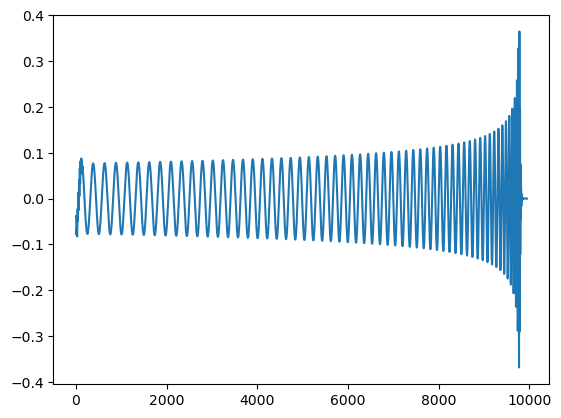

In [26]:
plt.plot(sim.t, sim.data[:,h.index(2,2)])
plt.plot(h_PN.t, h_PN.data[:,h.index(2,2)])
plt.show()

In [89]:
t

array([7.35257986e-01, 1.70907225e+00, 2.68227186e+00, ...,
       7.97670030e+03, 7.97680030e+03, 7.97690029e+03], shape=(19601,))

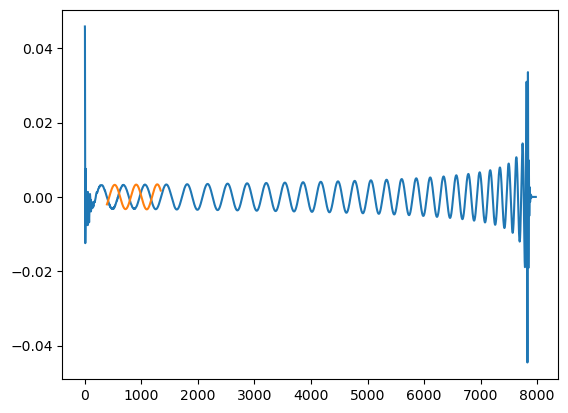

In [93]:
plt.plot(sim.t, sim.data[:,h.index(2,1)])
plt.plot(h_PN.t, h_PN.data[:,h.index(2,1)])
plt.show()